In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime
import pandas_datareader.data as web

In [3]:
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [4]:
year = datetime.today().year
month = datetime.today().month
day = datetime.today().day
end = "%s-%s-%s" %(year-1,month,day)
start = "%s-%s-%s" %(year-2,month,day)

In [5]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'quandl', start, end, access_key="2R89GBx5133ux-s5Gmad")

<h1> Basic Analysis of Apple Stock </h1>

In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


Text(0.5, 1.0, 'Apple Stock from 2017-3-31 to 2018-3-31')

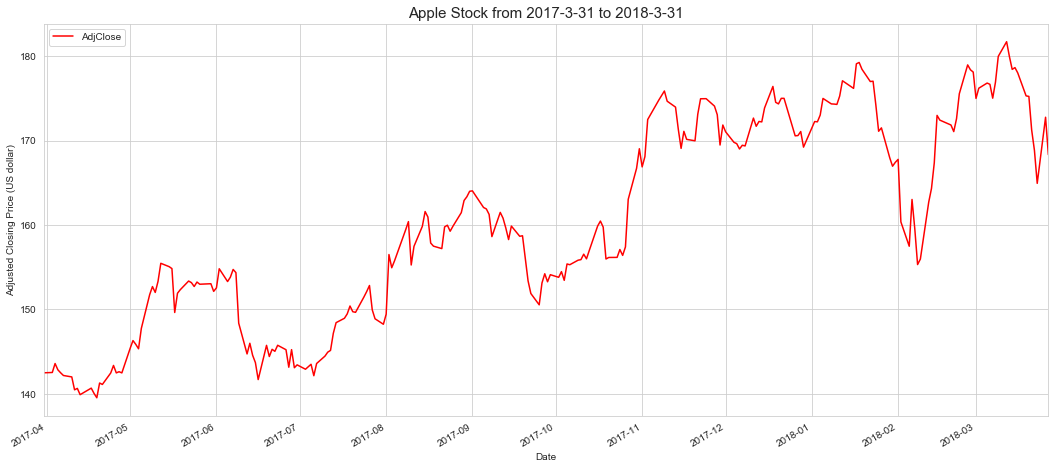

In [62]:
AAPL['AdjClose'].plot(legend=True, figsize=(18,8), color='r')
plt.ylabel("Adjusted Closing Price (US dollar)")
plt.title("Apple Stock from %s to %s" %(start,end), fontsize=15) 

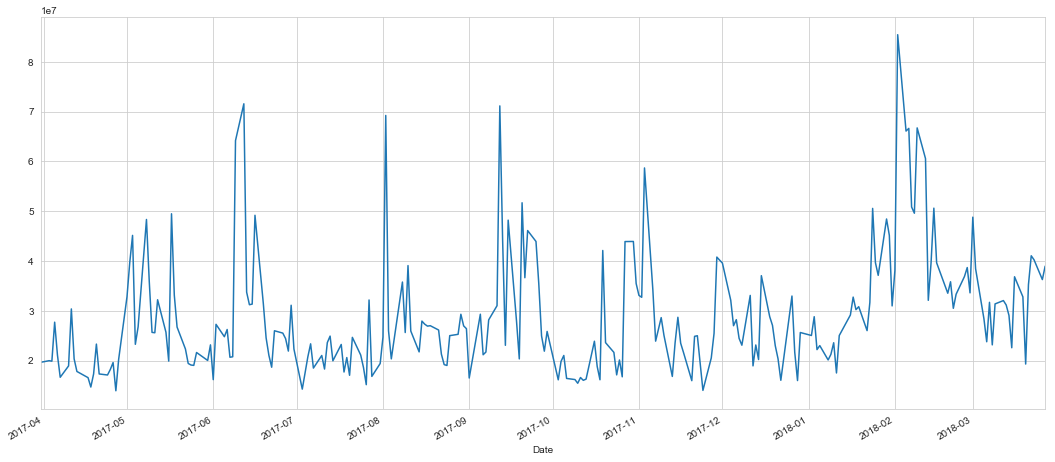

In [51]:
AAPL['Volume'].plot(figsize=(18,8))

Text(0, 0.5, 'Moving Average (US dollar)')

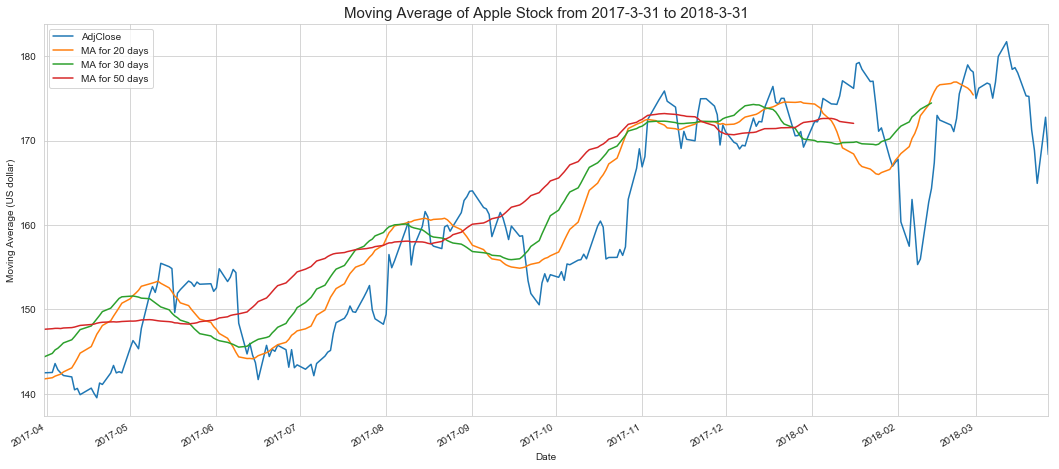

In [54]:
# MA stands for moving average
MA_day = [20,30,50]
for MA in MA_day:
    column_name = "MA for %s days" %(str(MA))
    AAPL[column_name] = AAPL['AdjClose'].rolling(MA).mean()

AAPL[['AdjClose', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(legend=True, figsize=(18,8))
plt.title('Moving Average of Apple Stock from %s to %s' %(start,end), fontsize=15)
plt.ylabel("Moving Average (US dollar)")

Text(0.5, 1.0, 'Apple Stock from 2017-3-31 to 2018-3-31')

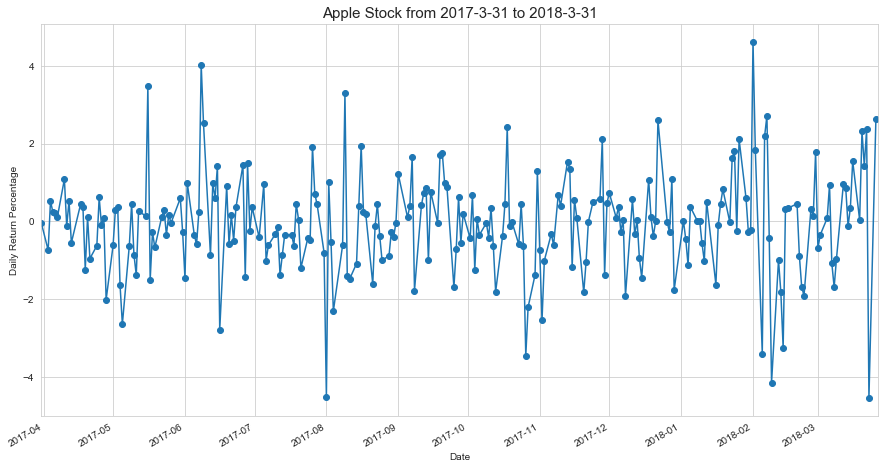

In [61]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()
AAPL['Daily Return'].multiply(100).plot(figsize=(15,8), marker='o')
plt.ylabel('Daily Return Percentage')
plt.title('Apple Stock from %s to %s' %(start,end), fontsize=15)

Text(0.5, 1.0, 'Apple Stock from 2017-3-31 to 2018-3-31')

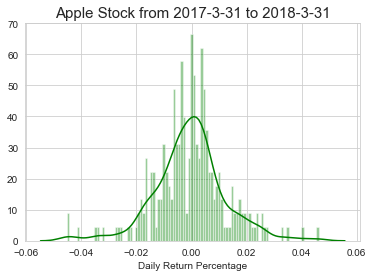

In [67]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')
plt.xlabel('Daily Return Percentage')
plt.title('Apple Stock from %s to %s' %(start,end), fontsize=15)

In [12]:
closing_df = pd.DataFrame(list([AAPL['AdjClose'],GOOGL['AdjClose'],MSFT['AdjClose'],AMZN['AdjClose']])).T
closing_df.columns = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [13]:
# calculate daily percentage return
tech_rets = closing_df.pct_change()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


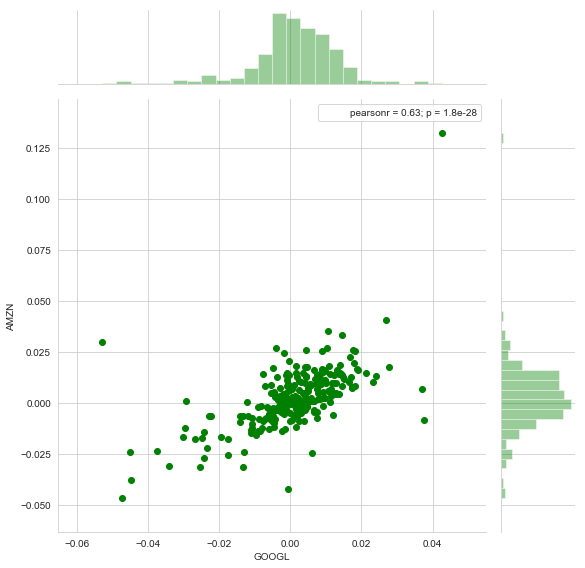

In [14]:
g = sns.JointGrid(x='GOOGL',y='AMZN', data=tech_rets, size=8)
g = g.plot_joint(plt.scatter, color = 'green')
g = g.plot_marginals(sns.distplot, kde=False, color="green")
g.annotate(stats.pearsonr)

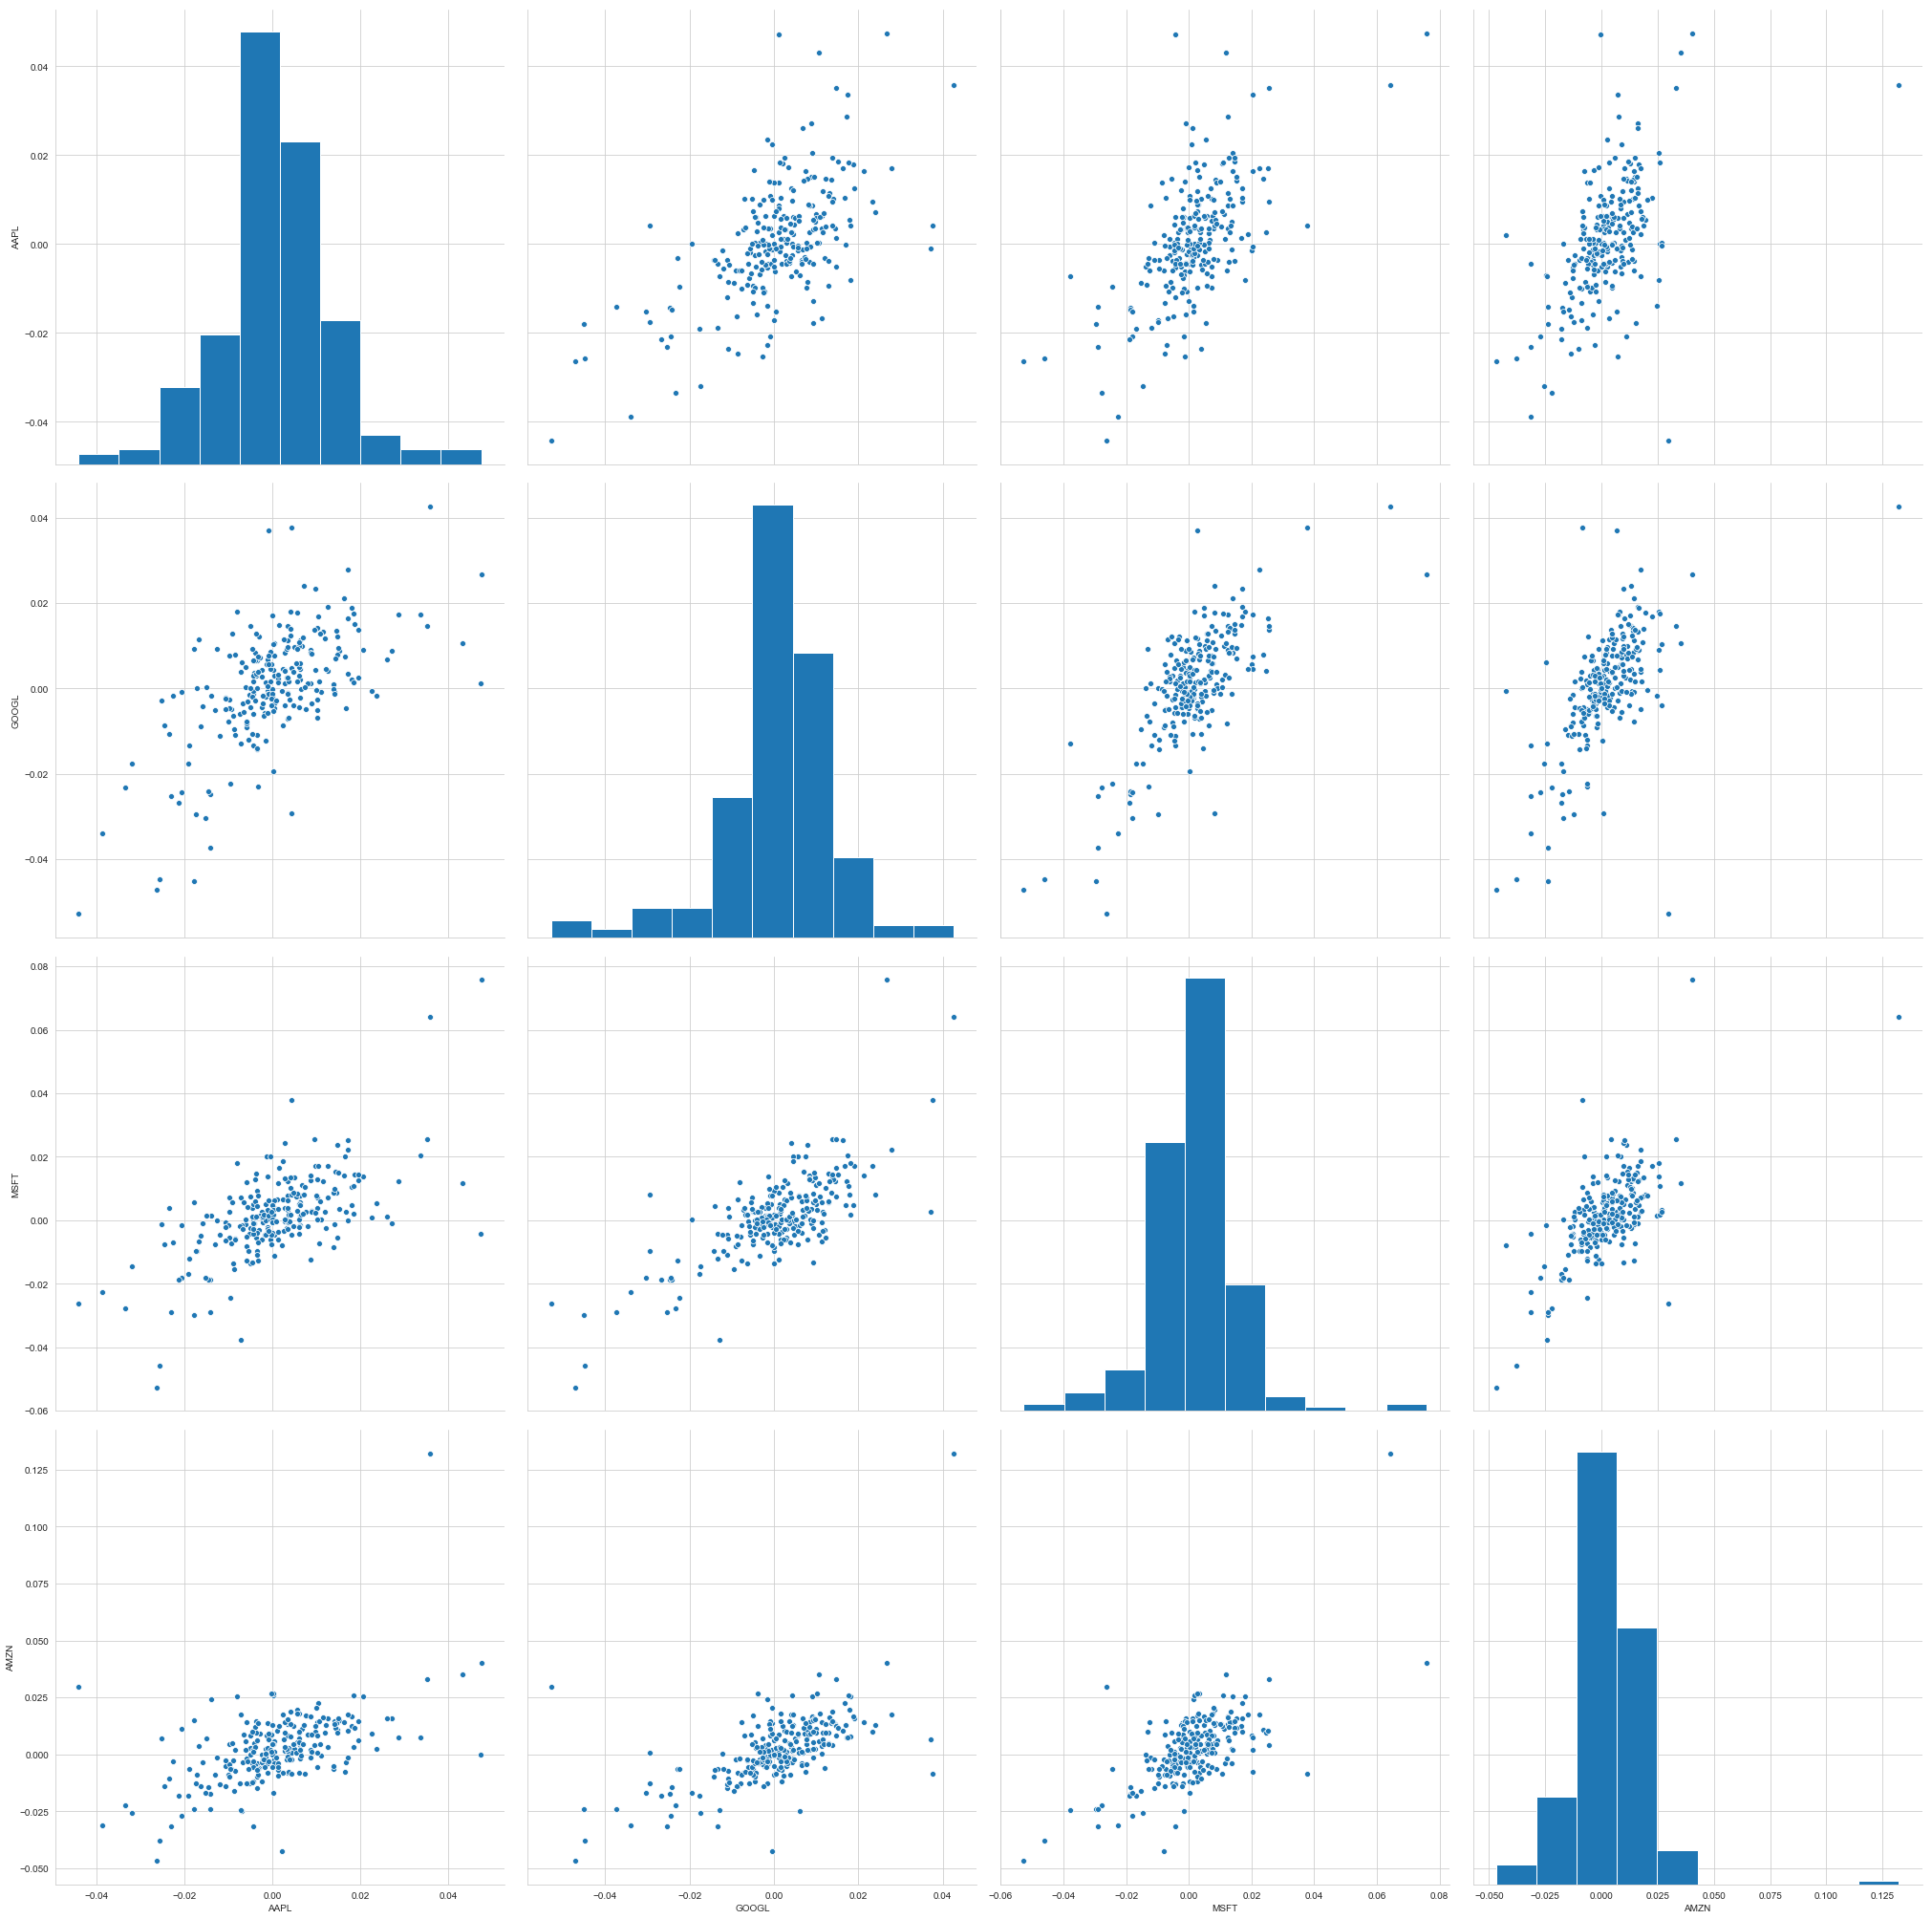

In [68]:
f = sns.pairplot(data=tech_rets.dropna(), height=7)

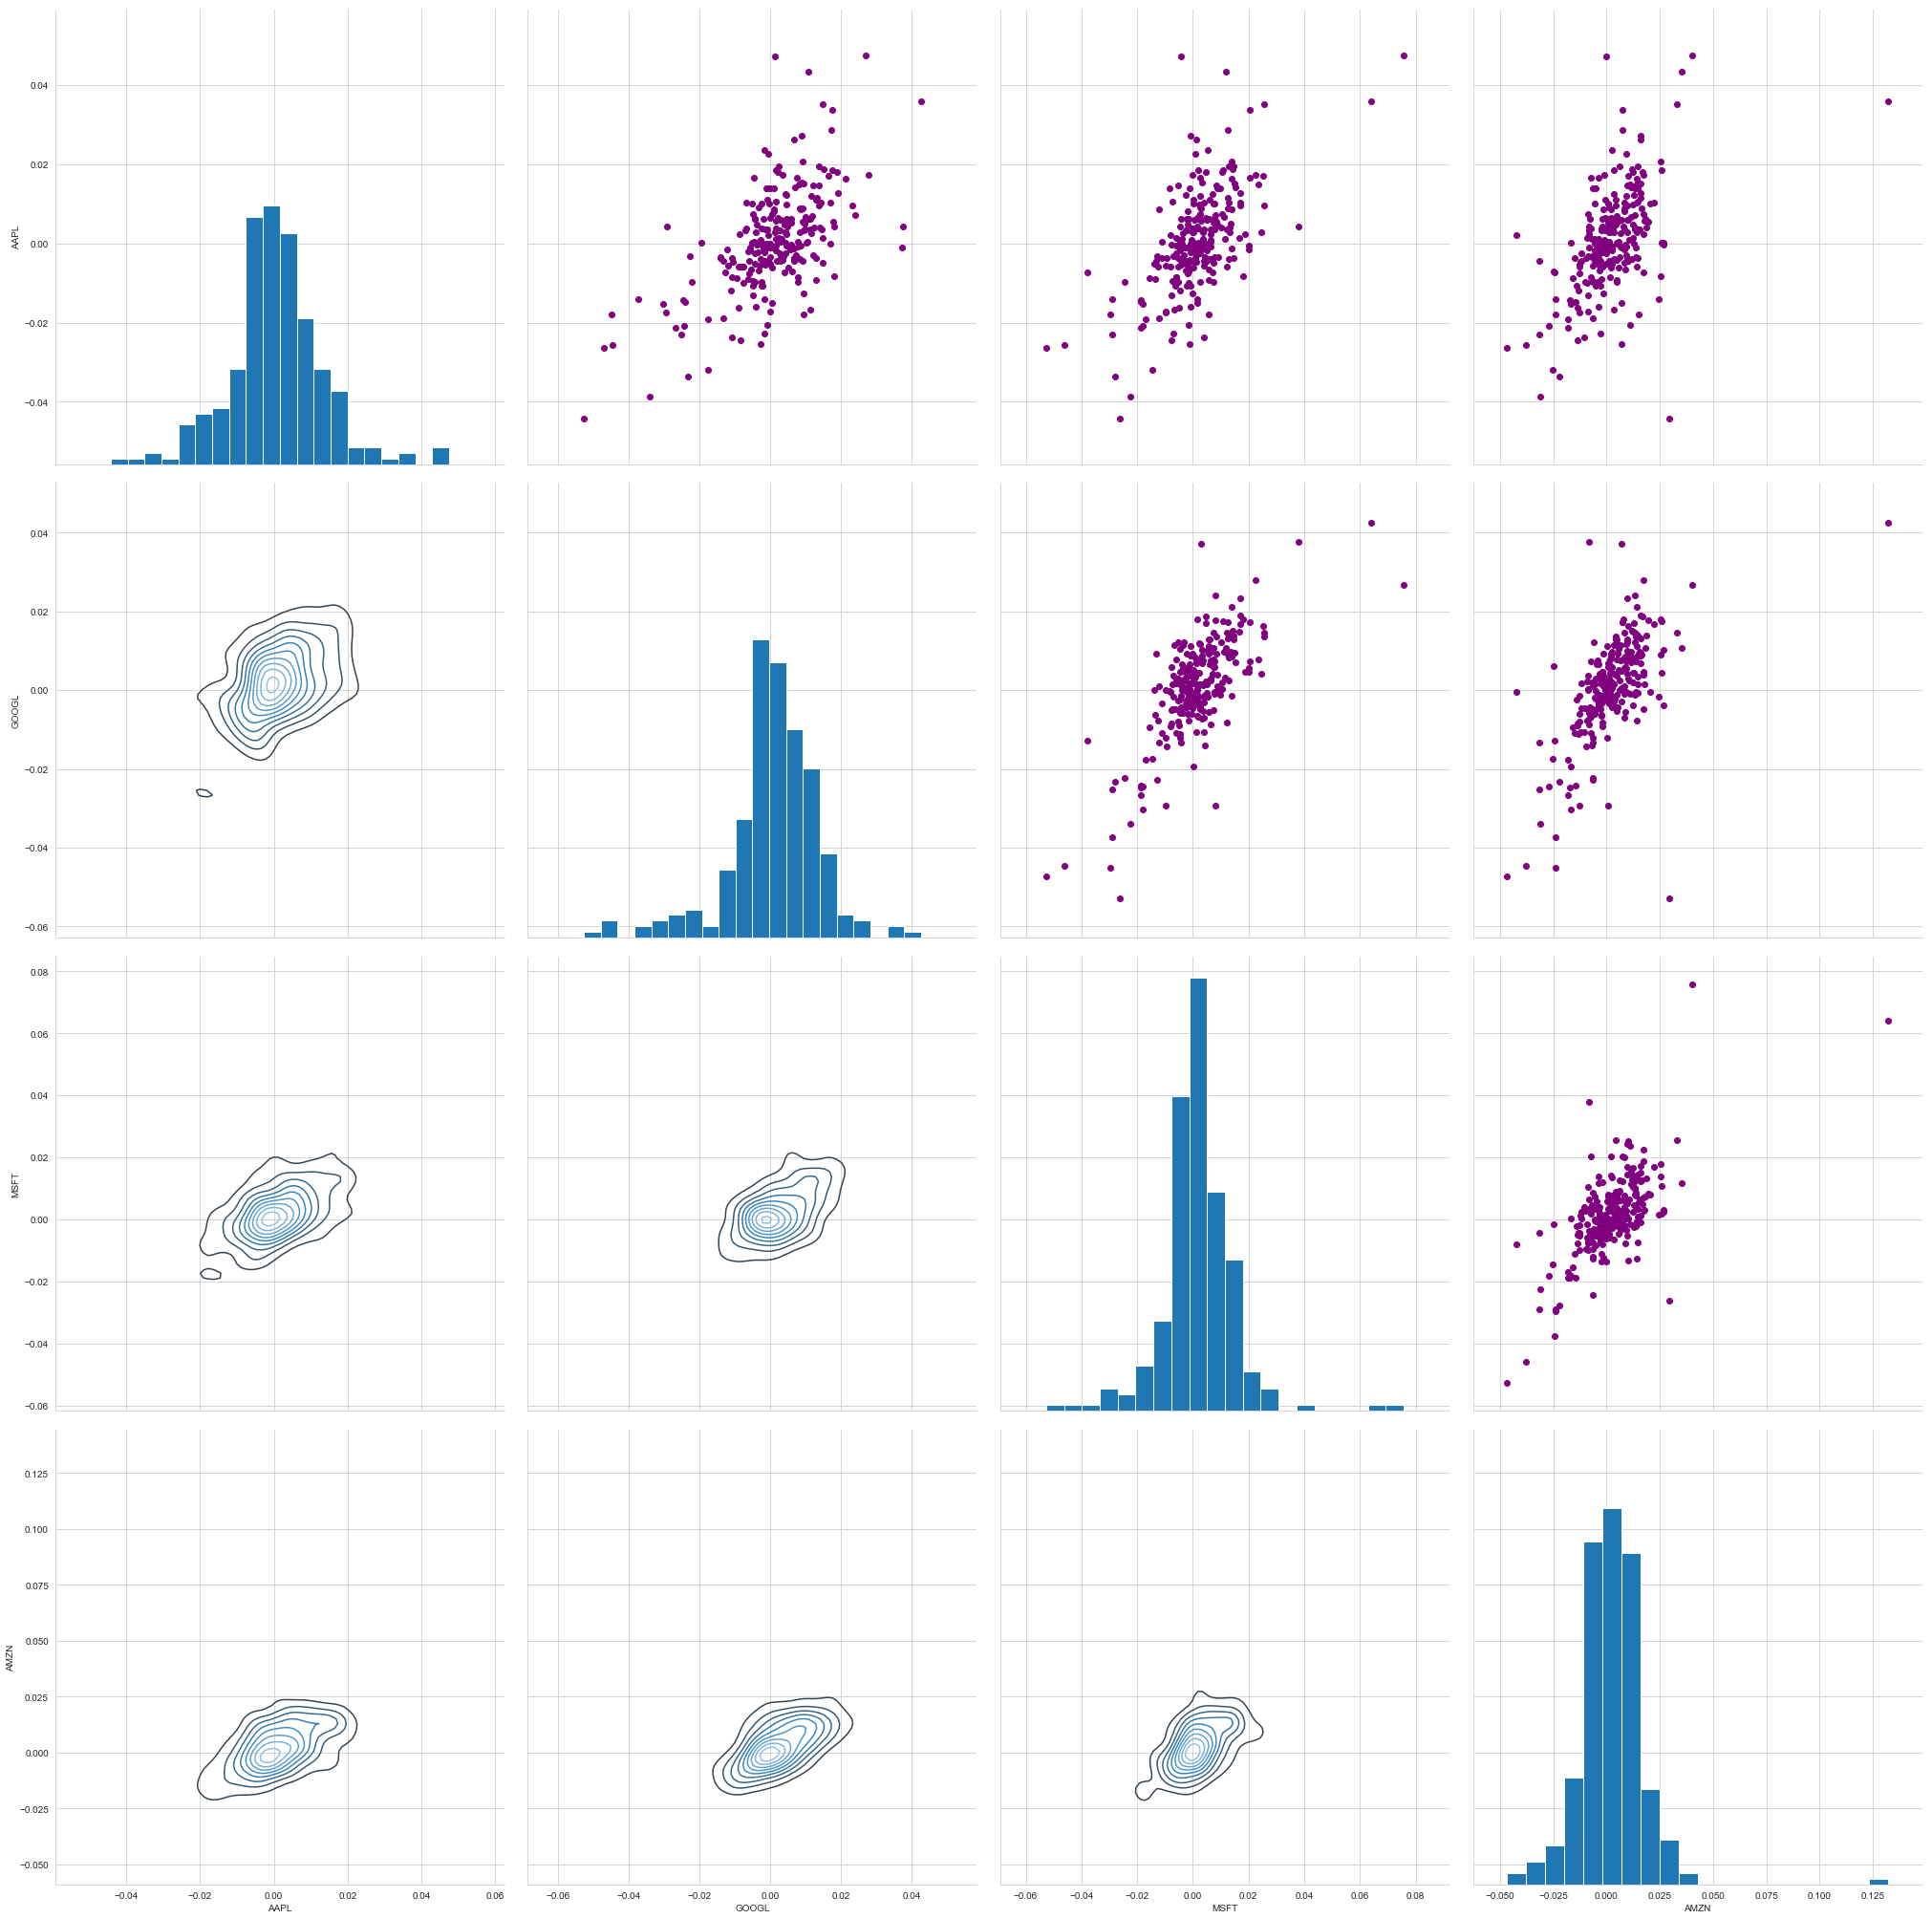

In [16]:
j = sns.PairGrid(tech_rets.dropna(), height=7)
j.map_upper(plt.scatter, color='purple')
j.map_lower(sns.kdeplot, cmap='Blues_d')
j.map_diag(plt.hist, bins=20)

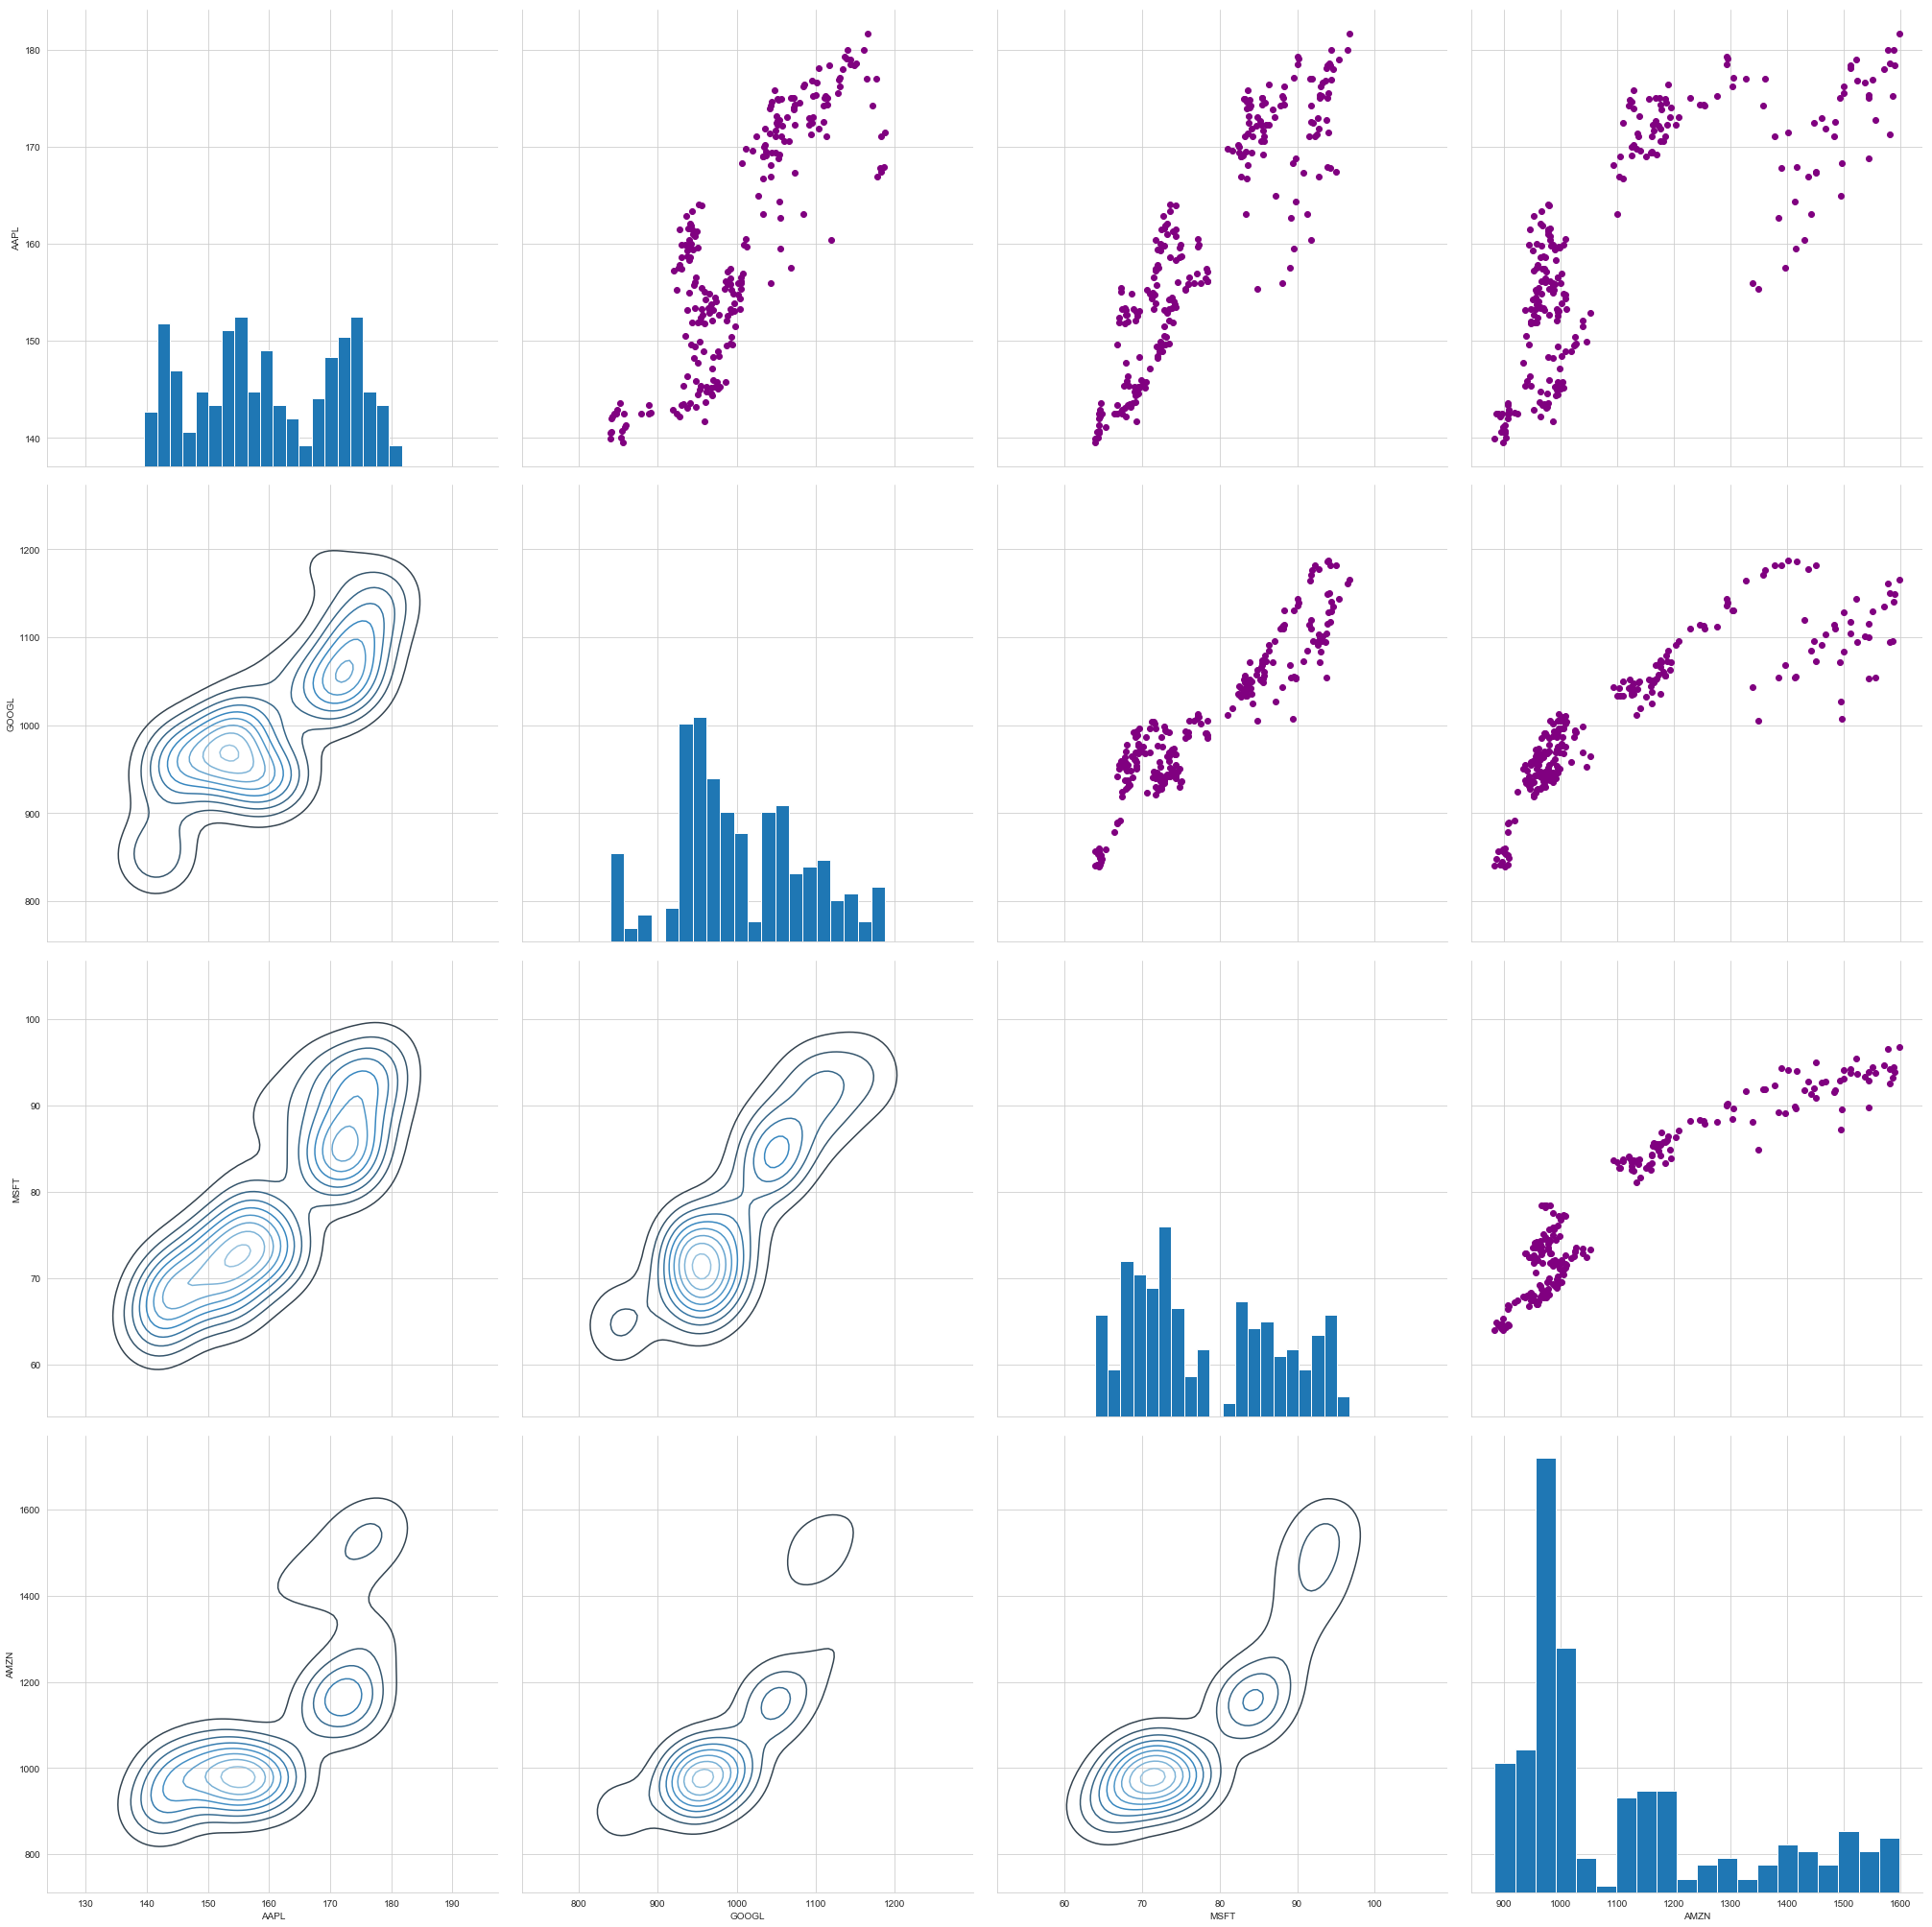

In [17]:
# Closing price 
j = sns.PairGrid(closing_df.dropna(), height=7)
j.map_upper(plt.scatter, color='purple')
j.map_lower(sns.kdeplot, cmap='Blues_d')
j.map_diag(plt.hist, bins=20)

In [18]:
tech_rets.corr(method='pearson')

,AAPL,GOOGL,MSFT,AMZN
AAPL,1.000000,0.608615,0.633926,0.538775
GOOGL,0.608615,1.000000,0.744976,0.627836
MSFT,0.633926,0.744976,1.000000,0.669692
AMZN,0.538775,0.627836,0.669692,1.000000


In [19]:
closing_df.corr(method='pearson')

,AAPL,GOOGL,MSFT,AMZN
AAPL,1.000000,0.845320,0.899286,0.767446
GOOGL,0.845320,1.000000,0.927942,0.859165
MSFT,0.899286,0.927942,1.000000,0.930723
AMZN,0.767446,0.859165,0.930723,1.000000


<h2> Risk Analysis </h2>

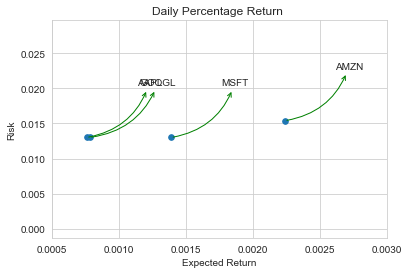

In [20]:
rets = tech_rets.dropna()
plt.scatter(x=rets.mean(), y=rets.std(), s=np.pi*10)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Daily Percentage Return ')
plt.xlim(0.0005, 0.003)
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.3', color='g'))

<h2> Value at Risk: Empirical Quantiles </h2>

In [21]:
rets['GOOGL'].quantile(0.01)

-0.044912710943276826

In [22]:
rets['AAPL'].quantile(0.01)

-0.03286819405604232

In [23]:
rets['AMZN'].quantile(0.01)

-0.03495953354994967

In [24]:
rets['MSFT'].quantile(0.01)

-0.0340624964278246

<h2> Value at Risk: Monte Carlo

In [25]:
days=365
dt=1/days
mu=rets['GOOGL'].mean()
sigma=rets['GOOGL'].std()
GOOGL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0


In [26]:
def monte_carlo (start_price,dt,mu,sigma,days):
    price=np.zeros(days)
    shock=np.zeros(days)
    drift=np.zeros(days)
    price[0]=start_price
    
    for i in range(1,days):
        shock[i] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[i] = mu*dt 
        price[i] = price[i-1] + price[i-1]*(drift[i] + shock[i])
    return price
            

Text(0.5, 1.0, 'Monte Carlo Simulation of Google Stock')

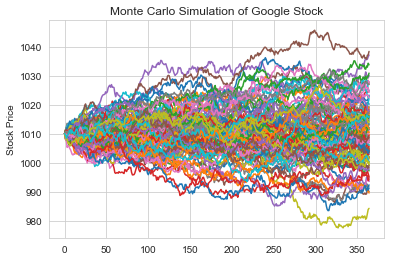

In [76]:
for x in range(100):
    plt.plot(monte_carlo(1010,dt,mu,sigma,days))
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation of Google Stock')

In [77]:
runs = 500
simulation = np.zeros(runs)
for j in range(runs):
    simulation[j] = monte_carlo(1010,dt,mu,sigma,days)[-1]

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  3.,  3.,  0.,  0.,  3.,  3.,  3.,  3.,  4.,  6.,  3.,
         2.,  4.,  4.,  2.,  9.,  5.,  6.,  7.,  4.,  8.,  5.,  8.,  9.,
        14.,  5., 17., 10., 10.,  5.,  6., 11.,  9., 15.,  9., 14.,  7.,
        12.,  9.,  9., 16.,  5., 11., 11., 12., 12.,  5., 12.,  8.,  8.,
         7.,  7.,  9.,  6.,  8.,  5.,  9.,  1.,  3.,  9., 11.,  6.,  5.,
         4.,  3.,  4.,  5.,  2.,  5.,  0.,  0.,  1.,  2.,  1.,  2.,  7.,
         1.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  2.]),
 array([ 972.51732578,  973.24825096,  973.97917613,  974.71010131,
         975.44102649,  976.17195166,  976.90287684,  977.63380202,
         978.36472719,  979.09565237,  979.82657755,  980.55750272,
         981.2884279 ,  982.01935308,  982.75027825,  983.48120343,
         984.21212861,  984.94305378,  985.67397896,  986.40490414,
         987.13582931,  987.86675449,  988.59767967,  989.32860484,
         990.05953002,  99

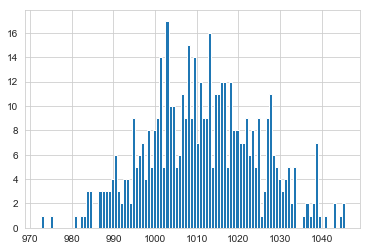

In [78]:
plt.hist(simulation,bins=100)

In [30]:
simulation.mean()

1012.8740779240536

AttributeError: 'str' object has no attribute 'info'